In [93]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

# TN CITIES

In [94]:
cities = gpd.read_file('data/TN_City_Boundaries.shp')

In [95]:
cities.head()

,OBJECTID,NAME,ShapeSTAre,ShapeSTLen,geometry
0,1,Baileyton,4.476669e+07,53934.034931,"POLYGON ((2901294.500 738992.625, 2900560.500 ..."
1,2,Baneberry,5.292213e+07,76408.707964,"POLYGON ((2772027.182 640621.675, 2771763.955 ..."
2,3,Bartlett,9.069788e+08,203164.841493,"POLYGON ((809649.628 347118.597, 809731.797 34..."
3,4,Baxter,8.932216e+07,84547.326363,"POLYGON ((2079493.486 669385.728, 2079493.825 ..."
4,5,Bean Station,1.671205e+08,192883.155722,"POLYGON ((2773906.098 745431.928, 2773920.064 ..."


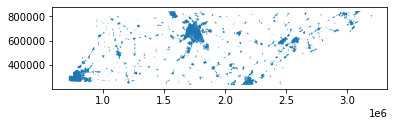

In [96]:
cities.plot();

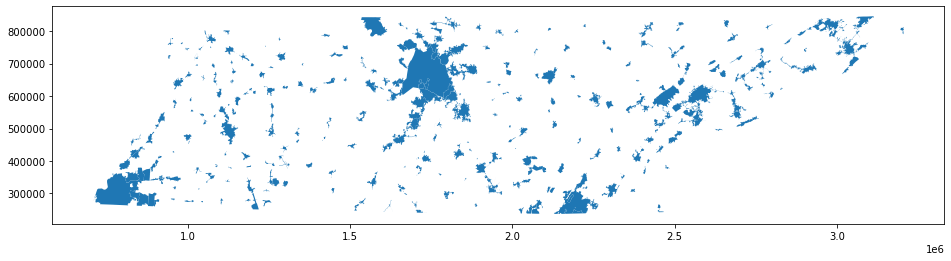

In [97]:
fig, ax = plt.subplots(figsize=(16,4))
cities.plot(ax = ax);

# TN Counties

In [98]:
counties = gpd.read_file('data/TN-47-tennessee-counties.json')
print(counties.crs)
counties.head(1)

None


,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."


In [150]:
# counties.geometry.to_crs('EPSG:4326')
# print(counties.crs)

counties.set_crs(epsg=4326, inplace=True)

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
1,None,47,119,01639772,0500000US47119,47119,Maury,06,1588021146,6319196,"POLYGON ((-87.33831 35.65954, -87.25526 35.700..."
2,None,47,177,01639796,0500000US47177,47177,Warren,06,1120635693,3508325,"POLYGON ((-85.88579 35.83899, -85.86812 35.845..."
3,None,47,147,01639786,0500000US47147,47147,Robertson,06,1233581423,451691,"POLYGON ((-87.11566 36.64403, -87.06088 36.645..."
4,None,47,067,01648577,0500000US47067,47067,Hancock,06,575820509,2984310,"POLYGON ((-83.47199 36.59917, -83.27585 36.597..."
...,...,...,...,...,...,...,...,...,...,...,...
90,None,47,011,01639727,0500000US47011,47011,Bradley,06,851489149,6959141,"POLYGON ((-84.94572 35.28817, -84.92805 35.289..."
91,None,47,125,01639777,0500000US47125,47125,Montgomery,06,1396435233,12076781,"POLYGON ((-87.64047 36.63780, -87.34714 36.641..."
92,None,47,161,01639792,0500000US47161,47161,Stewart,06,1189665041,87232349,"POLYGON ((-88.07164 36.67768, -88.01156 36.676..."
93,None,47,025,01639733,0500000US47025,47025,Claiborne,06,1125572374,18099460,"POLYGON ((-83.98797 36.58920, -83.92966 36.587..."


In [151]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   STATEFP   95 non-null     object  
 2   COUNTYFP  95 non-null     object  
 3   COUNTYNS  95 non-null     object  
 4   AFFGEOID  95 non-null     object  
 5   GEOID     95 non-null     object  
 6   NAME      95 non-null     object  
 7   LSAD      95 non-null     object  
 8   ALAND     95 non-null     int64   
 9   AWATER    95 non-null     int64   
 10  geometry  95 non-null     geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 8.3+ KB


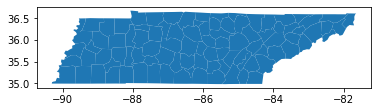

In [152]:
counties.plot();

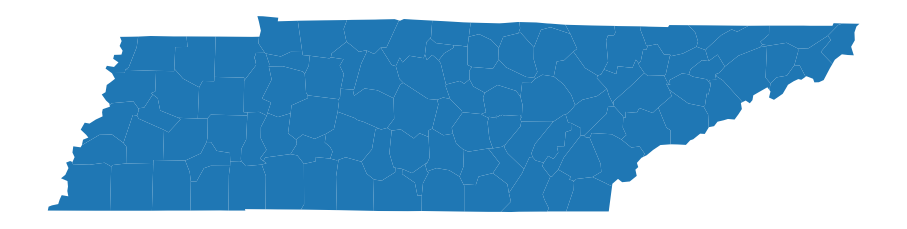

In [153]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [154]:
tn_county_stats = pd.read_csv('data/tn_county_stats.csv')

tn_county_stats .head()

,county,population,over65,pop_per_over_65,poverty_rate,pv_rate_per,num_ove_65_below_pov,pct_above_65_and_below_pov,without_car,sixtyfiveplus_per_growth_between_2019_2030,per_tot_pop_sixtyfiveplus_by_2030,veterans,per_african_american,minority_calls
0,Anderson,"76,978",16259,0.2112,16.5,0.165,2683,0.034854,0.10,0.20,0.25,0.22,4.0,15.0
1,Bedford,"49,713",7920,0.1593,14.4,0.144,1140,0.022932,0.06,0.34,0.19,0.22,8.4,104.0
2,Benton,"16,160",3877,0.2399,19.2,0.192,744,0.046040,0.09,0.11,0.28,0.25,2.5,2.0
3,Bledsoe,"15,064",2880,0.1912,26.7,0.267,769,0.051049,0.08,0.26,0.23,0.19,7.1,NaN
4,Blount,"133,088",27718,0.2083,9.9,0.099,2744,0.020618,0.05,0.30,0.25,0.22,3.0,51.0


In [155]:
stat_counties = pd.merge(left = counties, right = tn_county_stats, 
                    left_on = 'NAME', right_on = 'county')
stat_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   id                                          0 non-null      object  
 1   STATEFP                                     95 non-null     object  
 2   COUNTYFP                                    95 non-null     object  
 3   COUNTYNS                                    95 non-null     object  
 4   AFFGEOID                                    95 non-null     object  
 5   GEOID                                       95 non-null     object  
 6   NAME                                        95 non-null     object  
 7   LSAD                                        95 non-null     object  
 8   ALAND                                       95 non-null     int64   
 9   AWATER                                      95 non-null     int64   
 

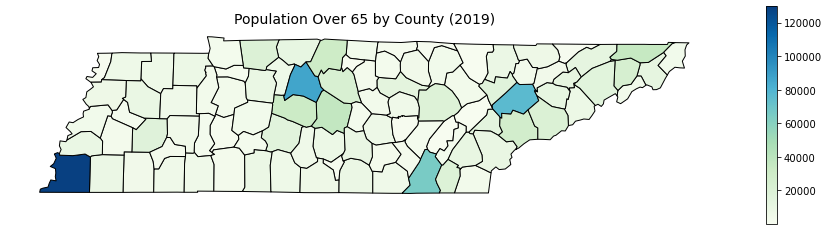

In [156]:
fig, ax = plt.subplots(figsize=(16,4))
stat_counties.plot(column = 'over65', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Population Over 65 by County (2019)', fontsize = 14)
ax.axis('off');

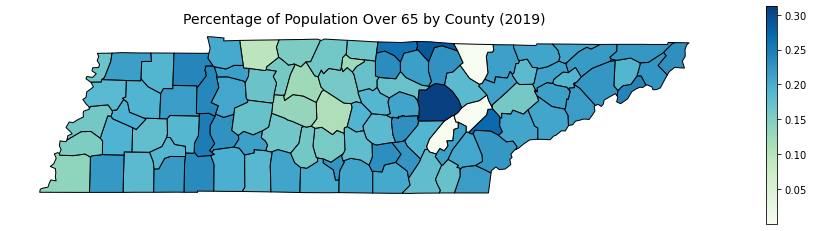

In [157]:
fig, ax = plt.subplots(figsize=(16,4))
stat_counties.plot(column = 'pop_per_over_65', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percentage of Population Over 65 by County (2019)', fontsize = 14)
ax.axis('off');

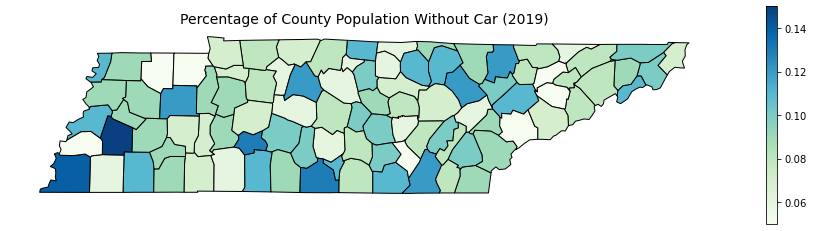

In [158]:
fig, ax = plt.subplots(figsize=(16,4))
stat_counties.plot(column = 'without_car', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percentage of County Population Without Car (2019)', fontsize = 14)
ax.axis('off');

# Importing CDC Data on Teeth Loss

In [159]:
teeth_loss = pd.read_csv('data/500_Cities__Local_Data_for_Better_Health__2019_release(1).csv')
teeth_loss.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037018407,All teeth lost among adults aged >=65 Years,%,...,11.8,NaN,NaN,3813,"(36.0655938524, -86.9777719034)",HLTHOUT,TEETHLOST,4752006,4.703702e+10,Teeth Loss
1,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157022322,All teeth lost among adults aged >=65 Years,%,...,30.7,NaN,NaN,4197,"(35.0279594375, -90.0550087245)",HLTHOUT,TEETHLOST,4748000,4.715702e+10,Teeth Loss


#### Cleaning CDC data for map creation
- splitting geo column into lat and lon columns

In [160]:
split_data = teeth_loss['GeoLocation'].str.strip(')').str.strip('(').str.split(', ')
teeth_loss['lat'] = split_data.apply(lambda x: x[0])
teeth_loss['lon'] = split_data.apply(lambda x: x[1])
teeth_loss.head(1)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,lat,lon
0,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037018407,All teeth lost among adults aged >=65 Years,%,...,NaN,3813,"(36.0655938524, -86.9777719034)",HLTHOUT,TEETHLOST,4752006,4.703702e+10,Teeth Loss,36.0655938524,-86.9777719034


#### To spatially join the Teeth_Loss with the TN_County_Stats, create a GeoDataFrame of Teeth_Loss data
- First create a geometry column that is a `Point` datatype


In [161]:
teeth_loss['geometry'] = teeth_loss.apply(lambda x: Point((float(x.lon), 
                                                         float(x.lat))), 
                                        axis=1)
teeth_loss.head(1)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,lat,lon,geometry
0,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037018407,All teeth lost among adults aged >=65 Years,%,...,3813,"(36.0655938524, -86.9777719034)",HLTHOUT,TEETHLOST,4752006,4.703702e+10,Teeth Loss,36.0655938524,-86.9777719034,POINT (-86.9777719034 36.0655938524)


#### Teeth_Loss data has a geometry field, use it to build a GeoDataFrame 
- you want the CRS for the Teeth_Loss data to match the CRS in the TN_County_Stats GeoDataFrame 

In [162]:
stat_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [163]:
teeth_loss_geo = gpd.GeoDataFrame(teeth_loss, 
                           crs = stat_counties.crs, 
                           geometry = teeth_loss['geometry'])
teeth_loss_geo.head(30)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,lat,lon,geometry
0,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037018407,All teeth lost among adults aged >=65 Years,%,...,3813,"(36.0655938524, -86.9777719034)",HLTHOUT,TEETHLOST,4752006,4.703702e+10,Teeth Loss,36.0655938524,-86.9777719034,POINT (-86.97777 36.06559)
1,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157022322,All teeth lost among adults aged >=65 Years,%,...,4197,"(35.0279594375, -90.0550087245)",HLTHOUT,TEETHLOST,4748000,4.715702e+10,Teeth Loss,35.0279594375,-90.0550087245,POINT (-90.05501 35.02796)
2,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157022111,All teeth lost among adults aged >=65 Years,%,...,5742,"(35.0283164719, -90.0262104196)",HLTHOUT,TEETHLOST,4748000,4.715702e+10,Teeth Loss,35.0283164719,-90.0262104196,POINT (-90.02621 35.02832)
3,2016,TN,Tennessee,Knoxville,Census Tract,BRFSS,Health Outcomes,4740000-47093004614,All teeth lost among adults aged >=65 Years,%,...,2338,"(35.9477104912, -84.0481245366)",HLTHOUT,TEETHLOST,4740000,4.709300e+10,Teeth Loss,35.9477104912,-84.0481245366,POINT (-84.04812 35.94771)
4,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037011400,All teeth lost among adults aged >=65 Years,%,...,4461,"(36.1985224304, -86.7337794886)",HLTHOUT,TEETHLOST,4752006,4.703701e+10,Teeth Loss,36.1985224304,-86.7337794886,POINT (-86.73378 36.19852)
5,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157005000,All teeth lost among adults aged >=65 Years,%,...,1074,"(35.1214284589, -90.0510709047)",HLTHOUT,TEETHLOST,4748000,4.715700e+10,Teeth Loss,35.1214284589,-90.0510709047,POINT (-90.05107 35.12143)
6,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157003900,All teeth lost among adults aged >=65 Years,%,...,1184,"(35.144273538, -90.0385689276)",HLTHOUT,TEETHLOST,4748000,4.715700e+10,Teeth Loss,35.144273538,-90.0385689276,POINT (-90.03857 35.14427)
7,2016,TN,Tennessee,Knoxville,Census Tract,BRFSS,Health Outcomes,4740000-47093006900,All teeth lost among adults aged >=65 Years,%,...,6649,"(35.9600796074, -83.936075302)",HLTHOUT,TEETHLOST,4740000,4.709301e+10,Teeth Loss,35.9600796074,-83.936075302,POINT (-83.93608 35.96008)
8,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157009800,All teeth lost among adults aged >=65 Years,%,...,3110,"(35.158879497, -89.8968833402)",HLTHOUT,TEETHLOST,4748000,4.715701e+10,Teeth Loss,35.158879497,-89.8968833402,POINT (-89.89688 35.15888)
9,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037019111,All teeth lost among adults aged >=65 Years,%,...,4163,"(36.049231748, -86.6797916232)",HLTHOUT,TEETHLOST,4752006,4.703702e+10,Teeth Loss,36.049231748,-86.6797916232,POINT (-86.67979 36.04923)


Text(0.5, 1.0, 'Population by Zip Code')

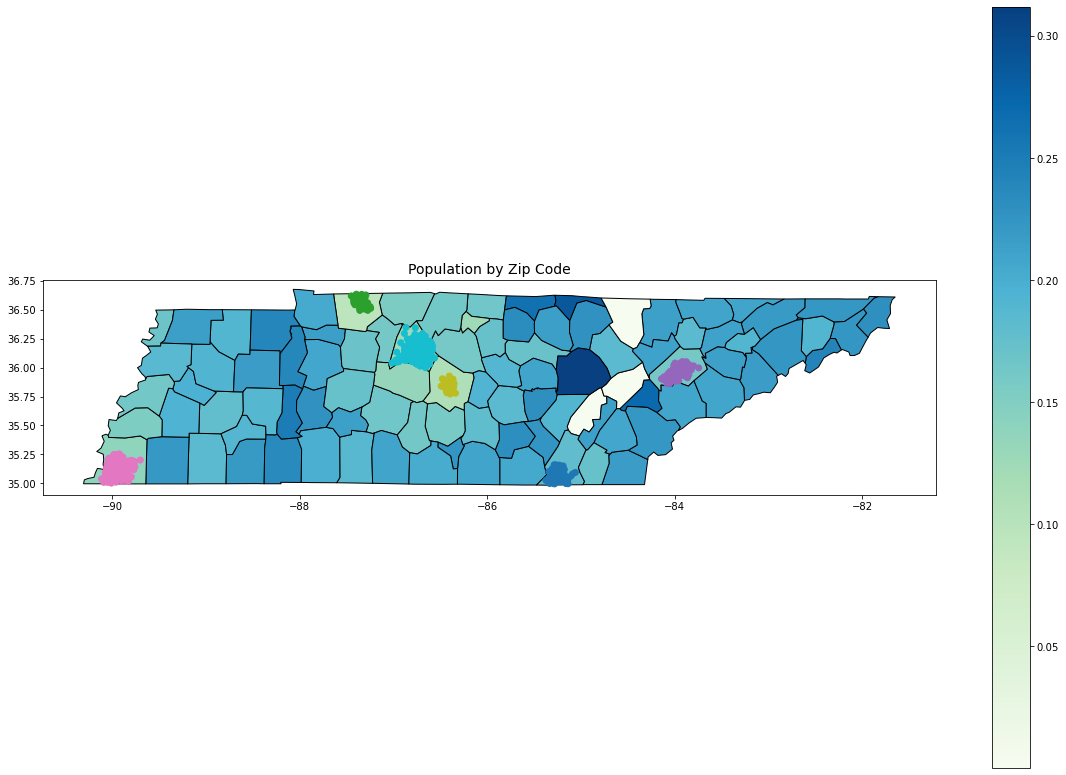

In [164]:
fig, ax = plt.subplots(figsize=(20, 14))
stat_counties.plot(column = 'pop_per_over_65', 
             cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
teeth_loss_geo.plot(ax=ax,column = 'CityName') #to show points on choropleth map
plt.title('Population by Zip Code', fontsize = 14)#ax.axis('off');

In [165]:
# Importing SmileOn

In [166]:
smile= pd.read_csv('data/SmileOn11.28.2020.csv',encoding = "ISO-8859-1")
smile.head(1)

C:\Users\18285\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,36,53,59,88,89,127,141,144,156,157,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
smile_small = pd.DataFrame() 

In [168]:
smile_small['race'] = smile['SMILE ON 60+ Demographic Information - Race/Ethnicity']

In [169]:
smile_small.race.unique()

array(['Caucasian', 'African American', 'Unknown', nan, 'Hispanic',
       'Asian', 'American Indian and Alaska Native', 'Multi-racial',
       'Pacific Islander'], dtype=object)

In [170]:
smile_small['county'] = smile['CountyName']

In [171]:
smile_small['ID'] = smile['CallerNum']

In [172]:
smile_small['last_screening'] = smile['SMILE ON 60+ Screening - Last Screening Date']

In [173]:
smile_small['call_date'] = smile['CallDateAndTimeStart']

In [174]:
smile_small['care_provided'] = smile['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)']

In [175]:
smile_small['clinic'] = smile['SMILE ON 60+ Site Information - Enroller ID']

In [176]:
smile_small['plan_completed'] = smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?']

In [177]:
smile_small['plan_developed'] = smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']

In [178]:
smile_small['function_restored'] = smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

In [179]:
smile_small.head(1)

,race,county,ID,last_screening,call_date,care_provided,clinic,plan_completed,plan_developed,function_restored
0,Caucasian,Robertson,3859874,NaN,11/25/2020 16:46,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN


In [180]:
race_list = ['African American', 'Unknown', 'Hispanic',
       'Asian', 'American Indian and Alaska Native', 'Multi-racial',
       'Pacific Islander']
minority = smile_small.query("race in @race_list")
minority.head(1)

,race,county,ID,last_screening,call_date,care_provided,clinic,plan_completed,plan_developed,function_restored
3,African American,Shelby,3231923,NaN,11/25/2020 14:17,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN


In [181]:
minority_counts = minority.county.value_counts().rename_axis('county').reset_index(name='counts')
minority_counts.tail(10)

,county,counts
62,Decatur,2
63,Dekalb,1
64,Crockett,1
65,Desoto,1
66,Chester,1
67,Roane,1
68,Obion,1
69,Fulton,1
70,Winchester City,1
71,Hickman,1


In [182]:
minority_counts = minority_counts.sort_values(by= 'county', ascending=True)
#topfive_2014 = gdp_int_14.sort_values(by= 'Internet_Users_Pct', ascending = False)
minority_counts.head()
#minority_counts.to_csv(r'C:\Users\18285\Desktop\minority_counts.csv')

,county,counts
30,Anderson,15
11,Bedford,104
58,Benton,2
16,Blount,51
5,Bradley,280


In [183]:
racial_minorities_geo = pd.merge(left = counties, right = minority_counts, 
                    left_on = 'NAME', right_on = 'county', how = 'outer')
racial_minorities_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   STATEFP   95 non-null     object  
 2   COUNTYFP  95 non-null     object  
 3   COUNTYNS  95 non-null     object  
 4   AFFGEOID  95 non-null     object  
 5   GEOID     95 non-null     object  
 6   NAME      95 non-null     object  
 7   LSAD      95 non-null     object  
 8   ALAND     95 non-null     float64 
 9   AWATER    95 non-null     float64 
 10  geometry  95 non-null     geometry
 11  county    72 non-null     object  
 12  counts    72 non-null     float64 
dtypes: float64(3), geometry(1), object(9)
memory usage: 10.9+ KB


fig, ax = plt.subplots(figsize=(16,4))
minority_counts.plot(column = 'counts', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('SmileOn Enrollment of Minorities by County)', fontsize = 14)
ax.axis('off');

def street_conv(addr):
    #print(addr)
    geolocator = Nominatim(user_agent="my_application")
    location = geolocator.geocode(addr)
    if location == None:
        #print('if')
        return None
    else:
        #print('else')
        return Point(location.longitude, location.latitude)
from geopy.geocoders import Nominatim
addresses = new_add.apply(street_conv)
new_houses['geometry'] = addresses



In [184]:
clinic_loc = pd.read_csv('data/center_loc.csv')
clinic_loc.head()

,location_number,Facility,Address,Zip,City,full_address
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208"
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660"
2,3,Christ Community Health Services- Frayser,969 Frayser Blvd,38127,Memphis,"969 Frayser Blvd, Memphis, TN 38127"
3,4,Neighborhood Health - Lebanon,217 E High St #200,37087,Lebanon,"217 E High St, Lebanon, TN 37087"
4,5,Christ Community Health Services- Raleigh,3481 Austin Peay Hwy,38128,Memphis,"3481 Austin Peay Hwy, Memphis, TN 38128"


In [185]:
addr_col = pd.DataFrame()

In [186]:
addr_col = clinic_loc['full_address']
addr_col.head()

0        1035 14th Ave N, Nashville, TN 37208
1    1105 W Stone Dr # 5, Kingsport, TN 37660
2         969 Frayser Blvd, Memphis, TN 38127
3            217 E High St, Lebanon, TN 37087
4     3481 Austin Peay Hwy, Memphis, TN 38128
Name: full_address, dtype: object

In [187]:
def street_conv(addr):
    #print(addr)
    geolocator = Nominatim(user_agent="my_application")
    location = geolocator.geocode(addr)
    if location == None:
        #print('if')
        return None
    else:
        #print('else')
        return Point(location.longitude, location.latitude)

addresses = addr_col.apply(street_conv)
clinic_loc['geometry'] = addresses

In [188]:
clinic_loc.head()
#clinic_loc.to_csv (r'C:\Users\18285\Desktop\clinic_loc.csv', index = False, header=True)

,location_number,Facility,Address,Zip,City,full_address,geometry
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208",POINT (-86.80084302487185 36.17025203391616)
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660",POINT (-82.57384074423052 36.5585389343394)
2,3,Christ Community Health Services- Frayser,969 Frayser Blvd,38127,Memphis,"969 Frayser Blvd, Memphis, TN 38127",POINT (-90.0314368977358 35.2171344409435)
3,4,Neighborhood Health - Lebanon,217 E High St #200,37087,Lebanon,"217 E High St, Lebanon, TN 37087",POINT (-86.2865960042697 36.2120914257803)
4,5,Christ Community Health Services- Raleigh,3481 Austin Peay Hwy,38128,Memphis,"3481 Austin Peay Hwy, Memphis, TN 38128",POINT (-89.9098503 35.22059489999999)


In [189]:
# split_data_2 = clinic_loc['geometry'].str.strip(')').str.strip('(').str.split(' ')
# clinic_loc['lat'] = split_data_2.apply(lambda x: x[0])
# clinic_loc['lon'] = split_data_2.apply(lambda x: x[1])
# clinic_loc.head(1)

#clinic_loc['lon'] = clinic_loc.point_object.x
#clinic_loc['lat'] = clinic_loc.point_object.y
#clinic_loc['lon'] = clinic_loc['geometry'].x
#clinic_loc['lat'] = clinic_loc['geometry'].y

clinic_loc['lon'] = clinic_loc.geometry.apply(lambda p: p.x)
clinic_loc['lat'] = clinic_loc.geometry.apply(lambda p: p.y)
clinic_loc.head()

,location_number,Facility,Address,Zip,City,full_address,geometry,lon,lat
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208",POINT (-86.80084302487185 36.17025203391616),-86.800843,36.170252
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660",POINT (-82.57384074423052 36.5585389343394),-82.573841,36.558539
2,3,Christ Community Health Services- Frayser,969 Frayser Blvd,38127,Memphis,"969 Frayser Blvd, Memphis, TN 38127",POINT (-90.0314368977358 35.2171344409435),-90.031437,35.217134
3,4,Neighborhood Health - Lebanon,217 E High St #200,37087,Lebanon,"217 E High St, Lebanon, TN 37087",POINT (-86.2865960042697 36.2120914257803),-86.286596,36.212091
4,5,Christ Community Health Services- Raleigh,3481 Austin Peay Hwy,38128,Memphis,"3481 Austin Peay Hwy, Memphis, TN 38128",POINT (-89.9098503 35.22059489999999),-89.909850,35.220595


In [190]:
stat_counties.head(1)

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,poverty_rate,pv_rate_per,num_ove_65_below_pov,pct_above_65_and_below_pov,without_car,sixtyfiveplus_per_growth_between_2019_2030,per_tot_pop_sixtyfiveplus_by_2030,veterans,per_african_american,minority_calls
0,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,...,14.4,0.144,1140,0.022932,0.06,0.34,0.19,0.22,8.4,104.0


In [191]:
clinic_geo = gpd.GeoDataFrame(clinic_loc, 
                           crs = stat_counties.crs, 
                           geometry = clinic_loc['geometry'])

In [222]:
clinic_geo.head()

,location_number,Facility,Address,Zip,City,full_address,geometry,lon,lat,buffer
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208",POINT (-86.80084 36.17025),-86.800843,36.170252,"POLYGON ((-56.80084 36.17025, -56.94530 33.229..."
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660",POINT (-82.57384 36.55854),-82.573841,36.558539,"POLYGON ((-52.57384 36.55854, -52.71830 33.618..."
2,3,Christ Community Health Services- Frayser,969 Frayser Blvd,38127,Memphis,"969 Frayser Blvd, Memphis, TN 38127",POINT (-90.03144 35.21713),-90.031437,35.217134,"POLYGON ((-60.03144 35.21713, -60.17590 32.276..."
3,4,Neighborhood Health - Lebanon,217 E High St #200,37087,Lebanon,"217 E High St, Lebanon, TN 37087",POINT (-86.28660 36.21209),-86.286596,36.212091,"POLYGON ((-56.28660 36.21209, -56.43105 33.271..."
4,5,Christ Community Health Services- Raleigh,3481 Austin Peay Hwy,38128,Memphis,"3481 Austin Peay Hwy, Memphis, TN 38128",POINT (-89.90985 35.22059),-89.909850,35.220595,"POLYGON ((-59.90985 35.22059, -60.05431 32.280..."


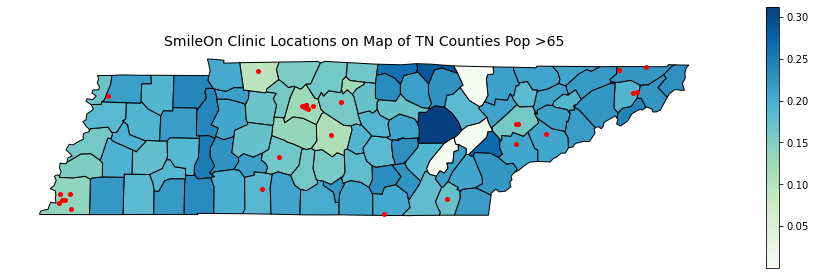

In [193]:
fig, ax = plt.subplots(figsize=(16, 16))
stat_counties.plot(column = 'pop_per_over_65', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,legend_kwds={'shrink': 0.3},
              ax = ax)
clinic_geo.plot(ax=ax,color='red', markersize=16) #to show points on choropleth map
plt.title('SmileOn Clinic Locations on Map of TN Counties Pop >65', fontsize = 14)
ax.axis('off');

#pointcolors = plt.cm.ScalarMappable(norm, cmap)
#color='green', markersize=5
#plt.legend(["blue", "orange"], prop={"size":20})



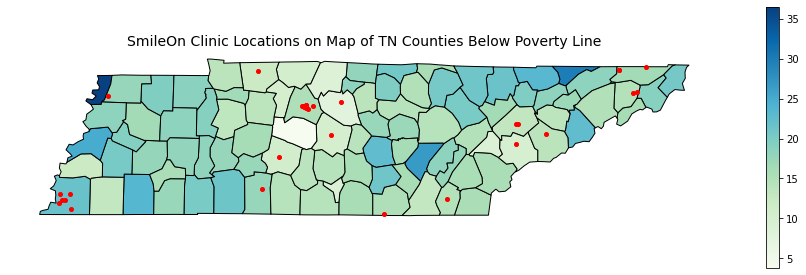

In [194]:
fig, ax = plt.subplots(figsize=(16, 16))
stat_counties.plot(column = 'poverty_rate', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,legend_kwds={'shrink': 0.3},
              ax = ax)
clinic_geo.plot(ax=ax,color='red', markersize=16) #to show points on choropleth map
plt.title('SmileOn Clinic Locations on Map of TN Counties Below Poverty Line', fontsize = 14)
ax.axis('off');


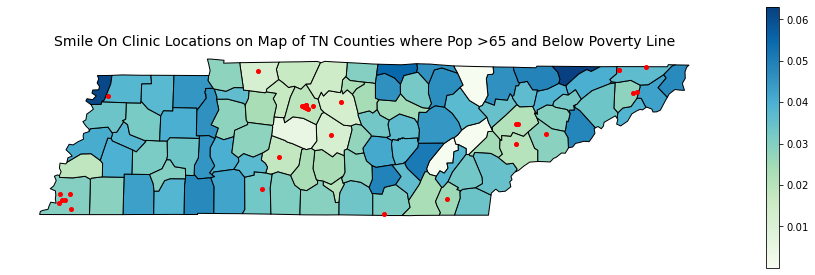

In [195]:
fig, ax = plt.subplots(figsize=(16, 16))
stat_counties.plot(column = 'pct_above_65_and_below_pov', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,legend_kwds={'shrink': 0.3},
              ax = ax)
clinic_geo.plot(ax=ax,color='red', markersize=16) #to show points on choropleth map
plt.title('Smile On Clinic Locations on Map of TN Counties where Pop >65 and Below Poverty Line', fontsize = 14)
ax.axis('off');

fig, ax = plt.subplots(figsize=(20, 14))
stat_counties.plot(column = 'pct_above_65_and_below_pov', 
             cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True, legend_kwds={'shrink': 0.3},
              ax = ax)
teeth_loss_geo.plot(ax=ax,column = 'CityName') #to show points on choropleth map
clinic_geo.plot(ax=ax,color='red', markersize=16)
plt.title('Smile On Clinic Locations on Map of TN Counties where Pop >65 and Below Poverty Line', fontsize = 14)#ax.axis('off');

In [196]:
clinic_geo['buffer'] = clinic_geo['geometry'].buffer(30)

<ipython-input-196-873a00e3b0c0>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clinic_geo['buffer'] = clinic_geo['geometry'].buffer(30)


In [197]:
clinic_geo.head(1)

,location_number,Facility,Address,Zip,City,full_address,geometry,lon,lat,buffer
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208",POINT (-86.80084 36.17025),-86.800843,36.170252,"POLYGON ((-56.80084 36.17025, -56.94530 33.229..."


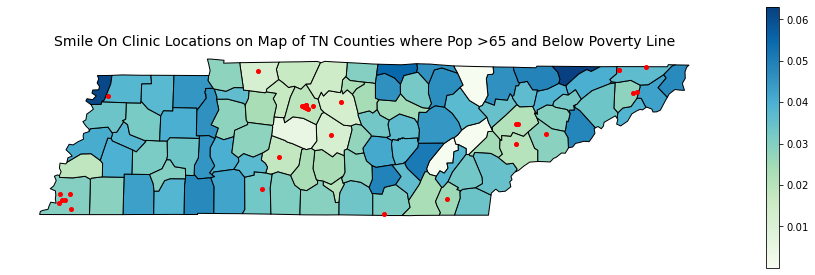

In [198]:
fig, ax = plt.subplots(figsize=(16, 16))
stat_counties.plot(column = 'pct_above_65_and_below_pov', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,legend_kwds={'shrink': 0.3},
              ax = ax)
clinic_geo.plot(ax=ax,color='red', markersize=16) #to show points on choropleth map
plt.title('Smile On Clinic Locations on Map of TN Counties where Pop >65 and Below Poverty Line', fontsize = 14)
ax.axis('off');

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

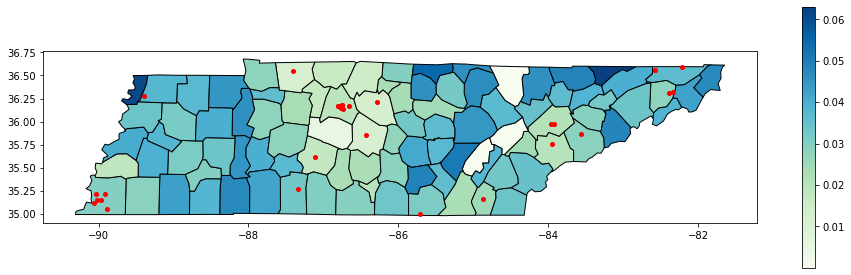

In [199]:
fig, ax = plt.subplots(figsize=(16, 16))
stat_counties.plot(column = 'pct_above_65_and_below_pov', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,legend_kwds={'shrink': 0.3},
              ax = ax)
clinic_geo.plot(ax=ax,color='red', markersize=16) #to show points on choropleth map
clinic_geo.plot(ax=ax,column = 'buffer')
plt.title('Smile On Clinic Locations on Map of TN Counties where Pop >65 and Below Poverty Line', fontsize = 14)
ax.axis('off');

In [200]:
polygon_tn = stat_counties
polygon_tn.shape

(95, 25)

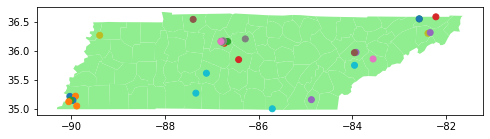

In [201]:
ax = polygon_tn.plot(figsize = (8, 10), color = 'lightgreen')
clinic_geo.plot( ax = ax, column = 'Facility');
plt.show();

In [202]:
clinic_chloro_map = folium.Map(location = (36.174465,-86.767960), zoom_start = 7)
clinic_chloro_map

In [203]:
i = 0
for row_index, row_values in clinic_geo.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
location_number                                                    1
Facility           Matthew Walker Comprehensive Health Center Inc...
Address                                              1035 14th Ave N
Zip                                                            37208
City                                                       Nashville
full_address                    1035 14th Ave N, Nashville, TN 37208
geometry                POINT (-86.80084302487185 36.17025203391616)
lon                                                         -86.8008
lat                                                          36.1703
buffer             POLYGON ((-56.80084302487185 36.17025203391616...
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
location_number                                                    2
Facility                   Friends in Need Health Center - Kingsport
Address                                          1105 W Stone Dr # 5
Zip

In [228]:
cluster_map_clinic_geo = folium.Map(location = (36.174465,-86.767960), zoom_start = 7)
#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_clinic_geo)

folium.GeoJson(polygon_tn).add_to(cluster_map_clinic_geo)
cluster_map_clinic_geo.choropleth(
 geo_data=stat_counties,
 name='choropleth',
 data=stat_counties,
 columns=['county', 'pct_above_65_and_below_pov'],
 key_on='feature.properties.county',
 fill_color='GnBu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Population'
)
folium.LayerControl().add_to(cluster_map_clinic_geo)

folium.LayerControl().add_to(cluster_map_clinic_geo)
# inside the loop add each markwe to the cluster
for row_index, row_values in clinic_geo.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['Facility'])
    icon=folium.Icon(color="red",icon="fa-hospital-o", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
        icon = icon)
    circle = folium.Circle(
        location = loc, 
        popup = pop, 
        color = 'red',
        fill = True,
        fill_color = 'red',
        #comment
        radius = 48280.3).add_to(cluster_map_clinic_geo)

    
    marker.add_to(marker_cluster)
    circle.add_to(cluster_map_clinic_geo)

cluster_map_clinic_geo

#tooltip (works for points)


# folium.GeoJson(zip_per_capita,
#                tooltip = GeoJsonTooltip(fields=['zip_code','per_capita_income'],
#                                                  aliases=['ZIP Code','Per Capita Income ($USD)'],
#                                                  labels=True,
#                                                  sticky=True,
#                                                  toLocalestring=True)
#               ).add_to(cluster_map_clinic_geo)
# clinic_geo.iloc[row_index]['Facility']*500)

In [ ]:


map_clinic = folium.Map(location =  area_center, zoom_start = 7)
#convert to float, radius arg seems to only work that way
clinics['Total Number of Times Care Provided'] = clinics['Total Number of Times Care Provided'].astype(float)
for row_index, row_values in clinics.iterrows():
    loc = [row_values['lat'], row_values['lng']] # references lat and lng columns
    pop = row_values['Site Info'] + '<br>' + 'Percent of Successful Restoration of Function per Procedure' + ' ' + str(row_values['Percent of Successful Restoration of Function']) +'%'
    marker = folium.Circle(
        location = loc, 
        popup = pop, 
        color = 'red',
        fill = True,
        fill_color = 'red',
        radius = clinics.iloc[row_index]['Total Number of Times Care Provided']*5).add_to(map_clinic)
map_clinic

